In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from time import time

import sys
sys.path.append('..')
from pvpro import PvProHandler
from solardatatools import DataHandler
from solardatatools.utilities import progress

In [2]:
def load_constellation_data(file_id, location='s3://pv.insight.misc/pv_fleets/',
                            data_fn_pattern='{}_20201006_composite.csv',
                            index_col=0, parse_dates=[0], json_file=False):
    df = pd.read_csv(location + data_fn_pattern.format(file_id), index_col=index_col, parse_dates=parse_dates)

    if json_file:
        try:
            from smart_open import smart_open
        except ImportError:
            print('Please install smart_open in your Python environment to use this function')
            return
        for line in smart_open(location + str(file_id) + '_system_details.json', 'rb'):
            file_json = json.loads(line)
            file_json
        return df, file_json
    return df

In [3]:
site_ids = np.arange(5000, 5517)

In [17]:
sys_ix = 0
metrics = np.zeros_like(site_ids, dtype=np.float)
ti = time()
for ix, sid in enumerate(site_ids):
    tf = time()
    progress(ix, len(site_ids), '{:.2f} minutes'.format((tf - ti) / 60))
    try:
        df = load_constellation_data(sid, json_file=False)
        volt_cols = [i for i in df.columns if 'dc_volt' in i]
        pow_cols = [i for i in df.columns if 'dc_pow' in i]
    #     curr_cols = [i for i in df.columns if 'dc_cur' in i]
    #     irr_cols = [i for i in df.columns if 'poa' in i]
    #     modT_cols = [i for i in df.columns if 'temperature_module' in i]
        dh = DataHandler(df)
        dh.run_pipeline(power_col=pow_cols[sys_ix], extra_cols=[volt_cols[sys_ix]], fix_dst=True, verbose=False)
        metric = np.nanstd(dh.extra_matrices[volt_cols[sys_ix]][0])
    except:
        metric = np.nan
    metrics[ix] = metric
tf = time()
progress(ix + 1, len(site_ids), 'DONE! {:.2f} minutes'.format((tf - ti) / 60))

/Users/bennetmeyers/miniconda3/envs/pvpro-dev/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


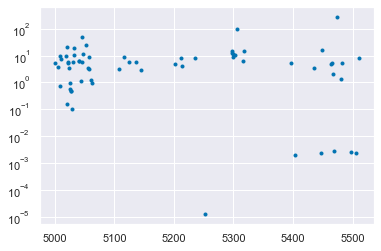

In [21]:
plt.plot(site_ids, metrics, marker='.', ls='none')
plt.yscale('log');

In [26]:
metrics_filled = np.nan_to_num(metrics, nan=-9999)
argst = np.argsort(metrics_filled)
list(zip(site_ids[argst][::-1][:50], metrics_filled[argst][::-1][:50]))

[(5473, 279.2699128749861),
 (5306, 100.45662144826743),
 (5045, 49.5089306515696),
 (5053, 24.30609329003767),
 (5021, 20.928057453797514),
 (5032, 18.65737773216968),
 (5449, 16.843224373274467),
 (5317, 15.091783936803992),
 (5297, 14.63246177752226),
 (5298, 12.792056907015981),
 (5299, 11.450035103842849),
 (5047, 11.392435690238477),
 (5302, 10.821468552414863),
 (5033, 10.205761572227898),
 (5019, 9.688940125786734),
 (5009, 9.676759988831082),
 (5116, 9.131373116927614),
 (5300, 8.953072106332746),
 (5058, 8.555654843131446),
 (5212, 8.364810897508834),
 (5511, 8.200023610242457),
 (5236, 8.107368700582379),
 (5010, 7.476753782206193),
 (5316, 6.3768381951937885),
 (5041, 6.109806208546486),
 (5040, 6.090774211487923),
 (5137, 6.011217454286411),
 (5031, 5.721998236095986),
 (5023, 5.696229947834443),
 (5046, 5.621793910283707),
 (5125, 5.55616054403124),
 (5482, 5.520075104254719),
 (5022, 5.4872659701605855),
 (5397, 5.444683564266219),
 (5000, 5.428535443429857),
 (5466, 5.3

In [27]:
len(metrics_filled)

517

In [ ]:
lunar_signals = [5317]